1. Importing the Necessary Libraries and Modules

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import joblib as jb
import xgboost as xgb
import lightgbm as lgb
from scipy import stats
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import FitFailedWarning
from sklearn.linear_model import BayesianRidge
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import learning_curve

warnings.simplefilter("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


2. Importing the Dataset

In [3]:
dataset = pd.read_csv("/content/Regreession Dataset.csv")
dataset

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307670
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899220
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476300
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029840
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309840
...,...,...,...,...,...,...,...,...,...,...,...,...
88131,37,female,29.27,1,yes,northeast,Heart disease,NaN,Rarely,White collar,Standard,19468.059940
88132,25,female,25.08,0,no,southwest,High blood pressure,Diabetes,Never,Unemployed,Standard,8525.698866
88133,50,male,37.11,3,yes,southwest,Heart disease,Heart disease,Frequently,Unemployed,Premium,28498.578200
88134,42,male,31.87,5,yes,southeast,NaN,High blood pressure,Never,White collar,Premium,19883.083800


3 . Getting the Information about Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88136 entries, 0 to 88135
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     88136 non-null  int64  
 1   gender                  88136 non-null  object 
 2   bmi                     88136 non-null  float64
 3   children                88136 non-null  int64  
 4   smoker                  88136 non-null  object 
 5   region                  88136 non-null  object 
 6   medical_history         65923 non-null  object 
 7   family_medical_history  66018 non-null  object 
 8   exercise_frequency      88135 non-null  object 
 9   occupation              88135 non-null  object 
 10  coverage_level          88135 non-null  object 
 11  charges                 88135 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 8.1+ MB


4 . Getting the Statistics of the Dataset

In [5]:
dataset.describe()

,age,bmi,children,charges
count,88136.000000,88136.000000,88136.000000,88135.000000
mean,41.422971,33.992252,2.500635,16724.193278
std,13.840261,9.250412,1.707232,4409.983999
min,18.000000,18.000000,0.000000,4011.061723
25%,29.000000,25.960000,1.000000,13599.976700
50%,41.000000,33.990000,2.000000,16591.624360
75%,53.000000,41.990000,4.000000,19763.804955
max,65.000000,50.000000,5.000000,32087.056690


5 . Analysis of NULL Values

In [6]:
dataset.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,22213
family_medical_history,22118
exercise_frequency,1
occupation,1


6 . Dropping Rows with NULL Values

In [7]:
dataset = dataset.dropna()
dataset.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,0
family_medical_history,0
exercise_frequency,0
occupation,0


7 . Visulizing the Data

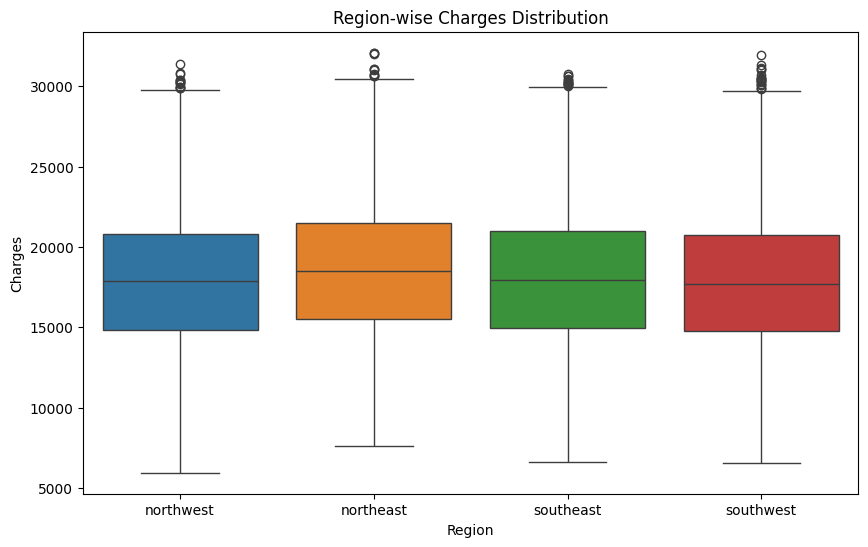

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="charges", data=dataset, hue="region")
plt.title("Region-wise Charges Distribution")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

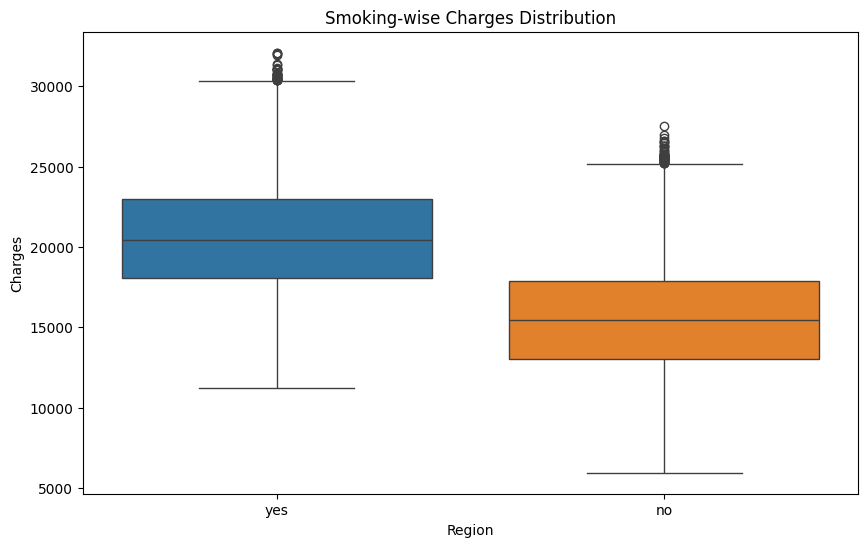

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="charges", data=dataset, hue="smoker")
plt.title("Smoking-wise Charges Distribution")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

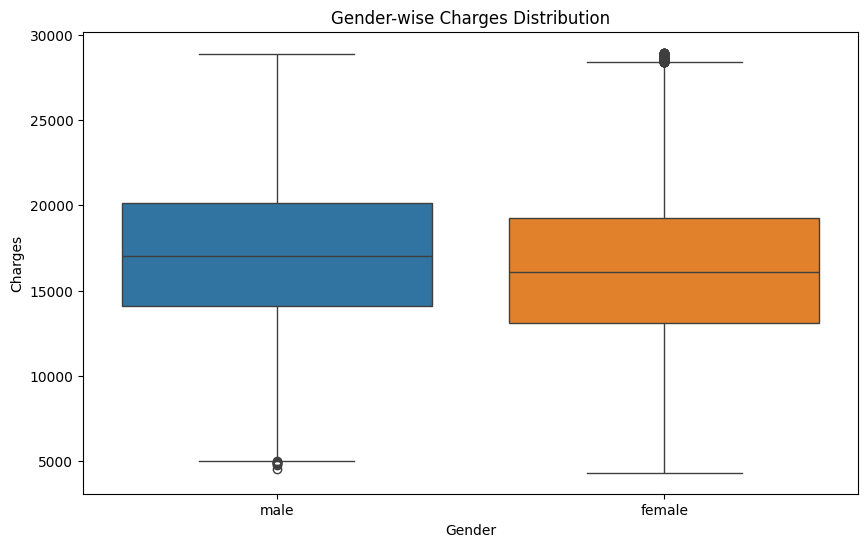

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="charges", data=dataset, hue="gender")
plt.title("Gender-wise Charges Distribution")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

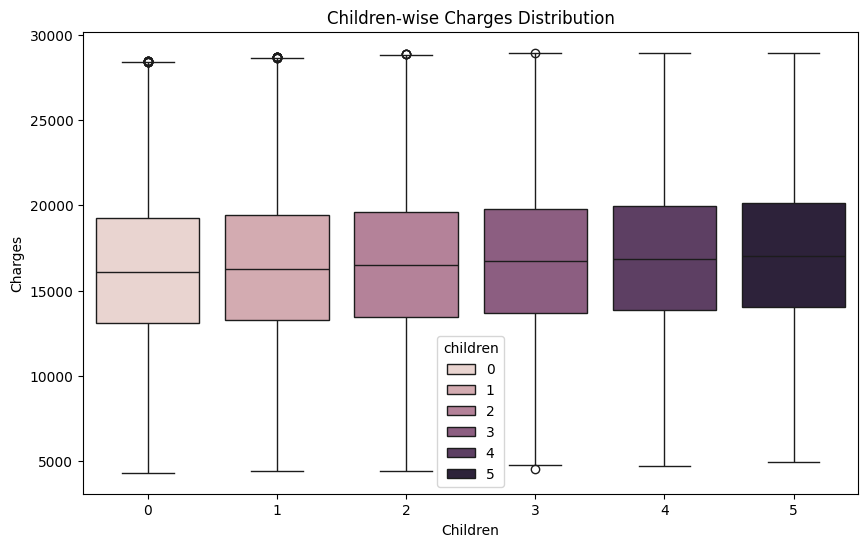

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="children", y="charges", data=dataset, hue="children")
plt.title("Children-wise Charges Distribution")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

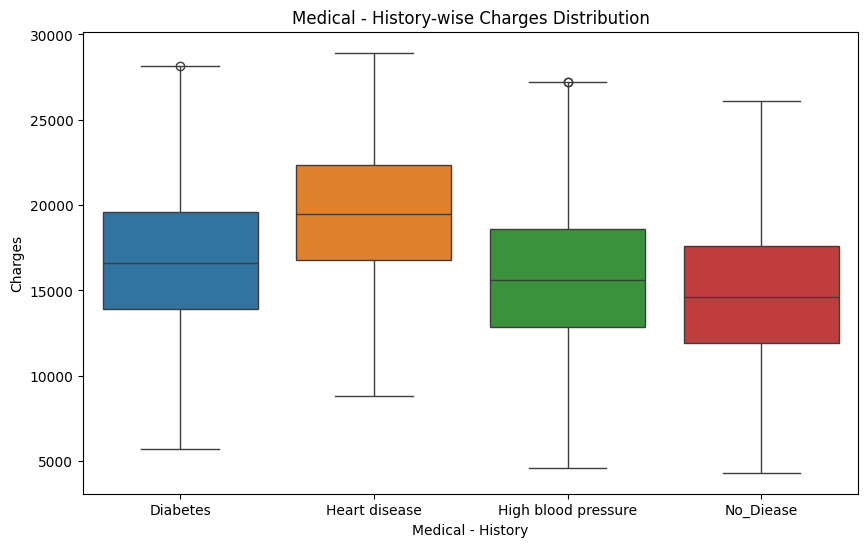

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="medical_history", y="charges", data=dataset, hue="medical_history")
plt.title("Medical - History-wise Charges Distribution")
plt.xlabel("Medical - History")
plt.ylabel("Charges")
plt.show()

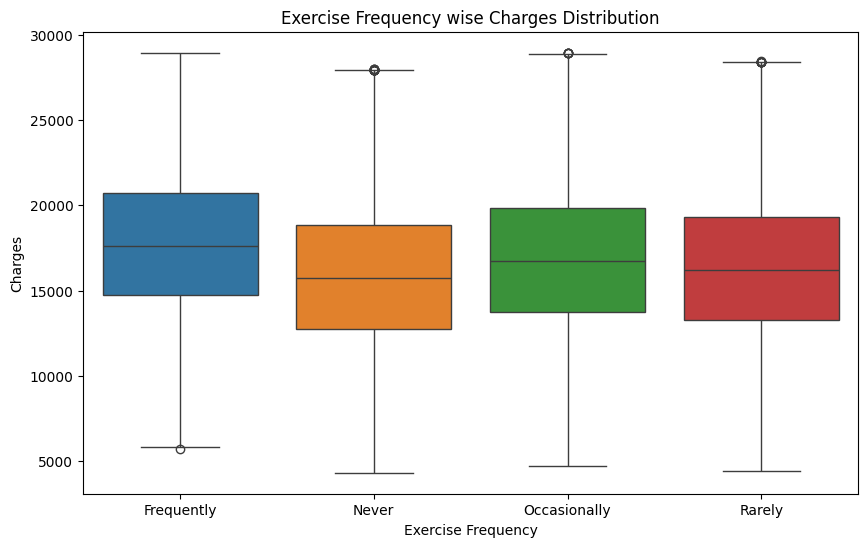

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="exercise_frequency", y="charges", data=dataset, hue="exercise_frequency")
plt.title("Exercise Frequency wise Charges Distribution")
plt.xlabel("Exercise Frequency")
plt.ylabel("Charges")
plt.show()

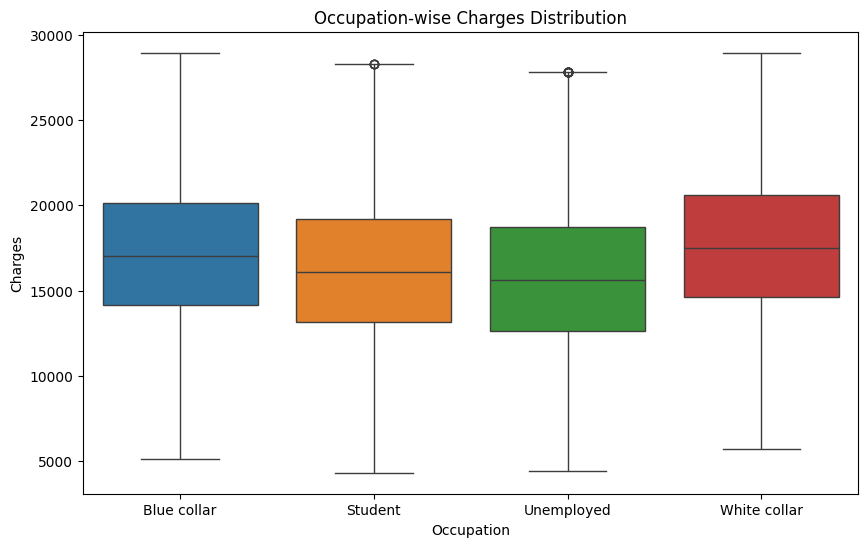

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="occupation", y="charges", data=dataset, hue="occupation")
plt.title("Occupation-wise Charges Distribution")
plt.xlabel("Occupation")
plt.ylabel("Charges")
plt.show()

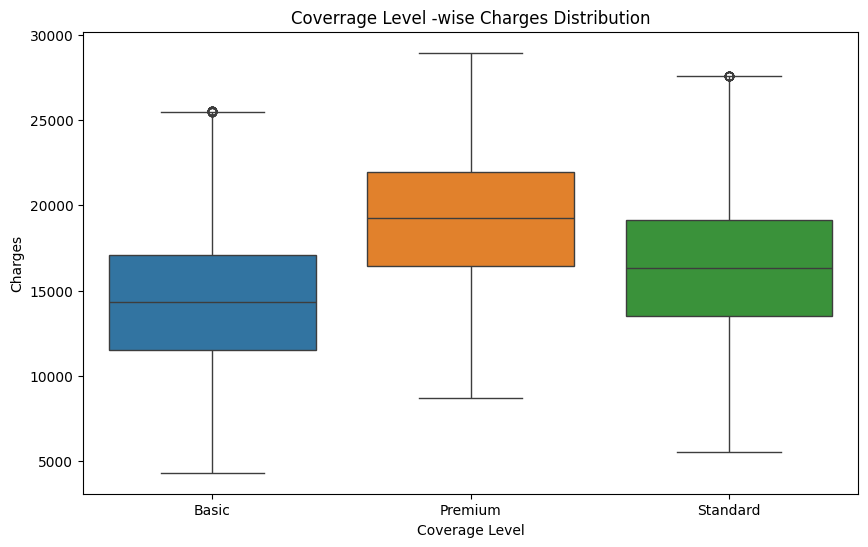

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="coverage_level", y="charges", data=dataset, hue="coverage_level")
plt.title("Coverrage Level -wise Charges Distribution")
plt.xlabel("Coverage Level")
plt.ylabel("Charges")
plt.show()

8 . Data Cleaning

In [10]:
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [12]:
Outlier_romove = [
    "children",
    "smoker",
    "region",
    "medical_history",
    "family_medical_history",
    "exercise_frequency",
    "coverage_level",
    "occupation",
]

for o in Outlier_romove:
    dataset = (dataset.groupby(o).apply(lambda x: remove_outliers(x, "charges")).reset_index(drop=True))

In [11]:
outliers = ["age", "bmi", "children", "charges"]

for feature in outliers :
    dataset = remove_outliers(dataset, feature)

9 . Feature Scaling

In [13]:
needs_to_be_scaled = ["age", "bmi", "children"]

for feature in needs_to_be_scaled:
    scaler = StandardScaler()
    dataset[feature] = scaler.fit_transform(dataset[[feature]])

10 . Binary Class Encoding

In [14]:
binary_class_feature = ["smoker", "gender"]

for feature in binary_class_feature:
    encoder = LabelEncoder()
    dataset[feature] = encoder.fit_transform(dataset[[feature]])

11 . Multiclass Classification

In [15]:
multi_class_feature = [
    "region",
    "medical_history",
    "family_medical_history",
    "exercise_frequency",
    "occupation",
    "coverage_level",
]

for feature in multi_class_feature:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_feature = encoder.fit_transform(dataset[[feature]])
    dataset = dataset.drop(columns=[feature])
    encoded_df = pd.DataFrame(
        encoded_feature, columns=encoder.get_feature_names_out([feature])
    )
    dataset = pd.concat([dataset, encoded_df], axis=1)

Plotting the Corelation Matrix

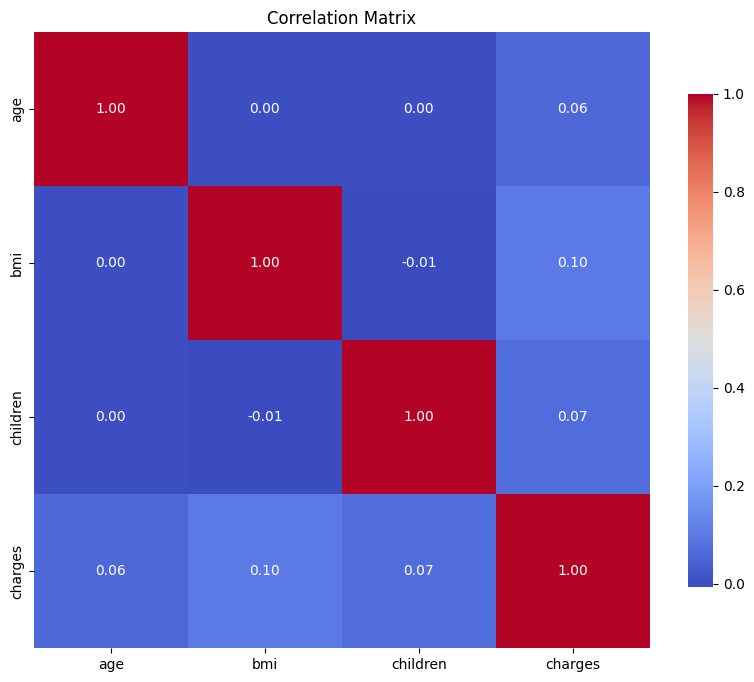

In [16]:
numerical_features = dataset[["age", "bmi", "children", "charges"]]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix")
plt.show()

12 . Spliting the dataset into Dependent and Independent Feature

In [17]:
X = dataset.drop("charges", axis="columns")
Y = pd.DataFrame(dataset["charges"])

13 . Spliting the dataset into train and test dataset

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

14 . Building the Model

In [ ]:
# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         "linear_regression": {"model": LinearRegression(), "param_grid": {}},
#         "ridge_regression": {
#             "model": Ridge(),
#             "param_grid": {"alpha": [0.1, 1.0, 10.0]},
#         },
#         "lasso_regression": {
#             "model": Lasso(),
#             "param_grid": {"alpha": [0.1, 1.0, 10.0]},
#         },
#         "polynomial_regression": {
#             "model": PolynomialFeatures(),
#             "param_grid": {
#                 "degree": [1, 2, 3]
#             },  # This is typically used with a regression model after polynomial transformation
#         },
#         "decision_tree_regression": {
#             "model": DecisionTreeRegressor(random_state=42),
#             "param_grid": {"max_depth": [None, 10, 20, 30]},
#         },
#         "random_forest_regression": {
#             "model": RandomForestRegressor(random_state=42),
#             "param_grid": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
#         },
#         "k_nearest_neighbors_regression": {
#             "model": KNeighborsRegressor(),
#             "param_grid": {"n_neighbors": [3, 5, 10]},
#         },
#         "gradient_boosting_regression": {
#             "model": GradientBoostingRegressor(random_state=42),
#             "param_grid": {
#                 "n_estimators": [100, 200],
#                 "learning_rate": [0.01, 0.1, 0.2],
#             },
#         },
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         try:
#             gs = GridSearchCV(
#                 config["model"],
#                 param_grid=config["param_grid"],
#                 cv=cv,
#                 error_score="raise",
#             )
#             gs.fit(X, y.squeeze())
#             scores.append(
#                 {
#                     "model": algo_name,
#                     "best_score": gs.best_score_,
#                     "best_params": gs.best_params_,
#                 }
#             )
#         except Exception as e:
#             print(f"Error with {algo_name}: {e}")

#     return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


# # Assuming X and Y are defined
# final_result = find_best_model_using_gridsearchcv(X, Y)

In [19]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Model evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {"MSE": mse, "R2 Score": r2, "Predicted Values": y_pred}

    # Learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring="r2",
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
    )

    # Calculate mean and standard deviation
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    # Plot learning curve
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
    plt.fill_between(
        train_sizes,
        train_mean - train_std,
        train_mean + train_std,
        color="blue",
        alpha=0.2,
    )

    plt.plot(
        train_sizes,
        val_mean,
        label="Cross-Validation Score",
        color="orange",
        marker="o",
    )
    plt.fill_between(
        train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
    )

    plt.title(f"Learning Curve {model}", fontsize=16, fontweight="bold")
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("R2 Score", fontsize=14)
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

    return metrics

Dictionary to Store the Result

In [20]:
final_result = {}

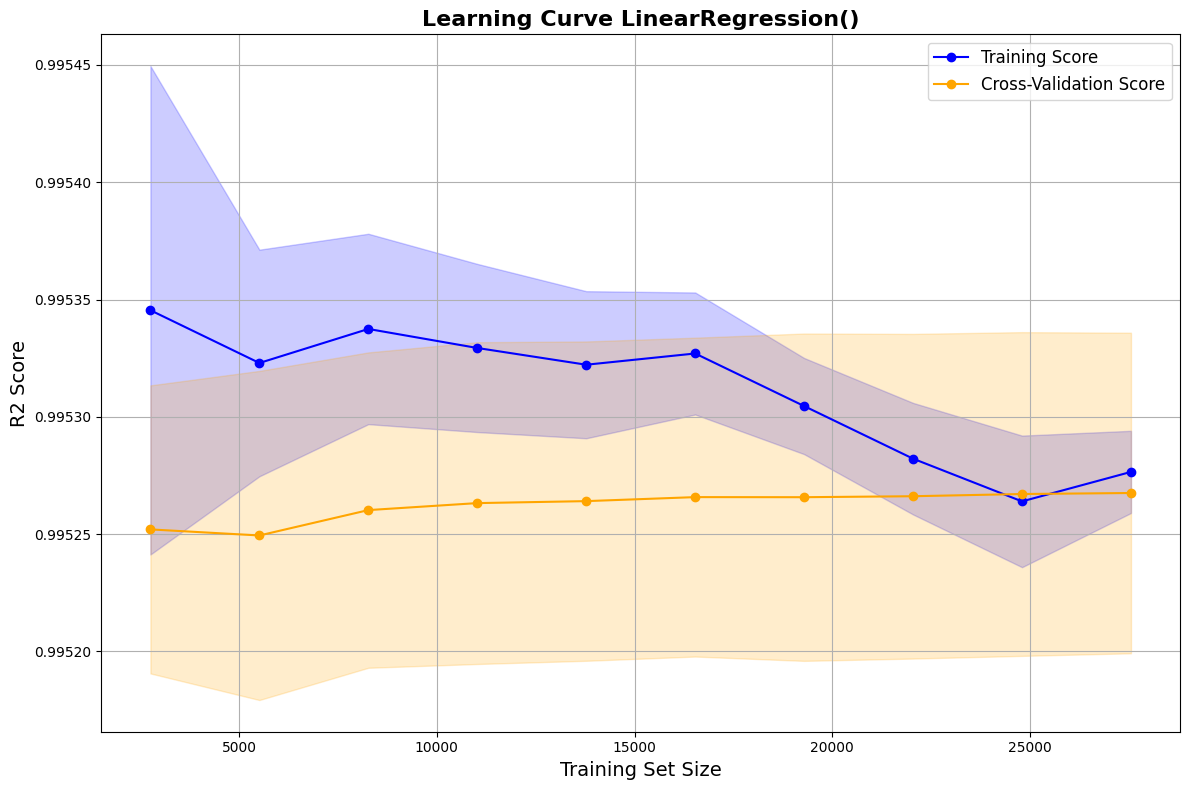

             Y_test  Linear Regression
count  14763.000000       14763.000000
mean   18016.646516       18019.376287
std     4240.014243        4231.041668
min     7038.173266        7284.927132
25%    14953.909115       14953.173918
50%    17970.157550       17950.511516
75%    20972.887205       21011.522457
max    29917.339140       29962.256025


In [21]:
# Linear Regression:

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = evaluate_model(linear_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_linear_values = y_pred_linear["Predicted Values"]

# Flatten y_pred_linear_values to 1D
y_pred_linear_values = (
    y_pred_linear_values.flatten()
)  # or use y_pred_linear_values.ravel()

# Calculate descriptive statistics
# Adding a column name to Y_test statistics:
y_test_stats = Y_test.describe()
y_test_stats.columns = ["Y_test"]
y_pred_stats = (
    pd.Series(y_pred_linear_values, name="Linear Regression")
    .describe()
    .to_frame(name="Linear Regression")
)

# Combine both statistics into one table
stats_table = pd.concat([y_test_stats, y_pred_stats], axis=1)

# Display the result
print(stats_table)

del y_pred_linear["Predicted Values"]
y_pred_linear
final_result["Linear Regression"] = y_pred_linear

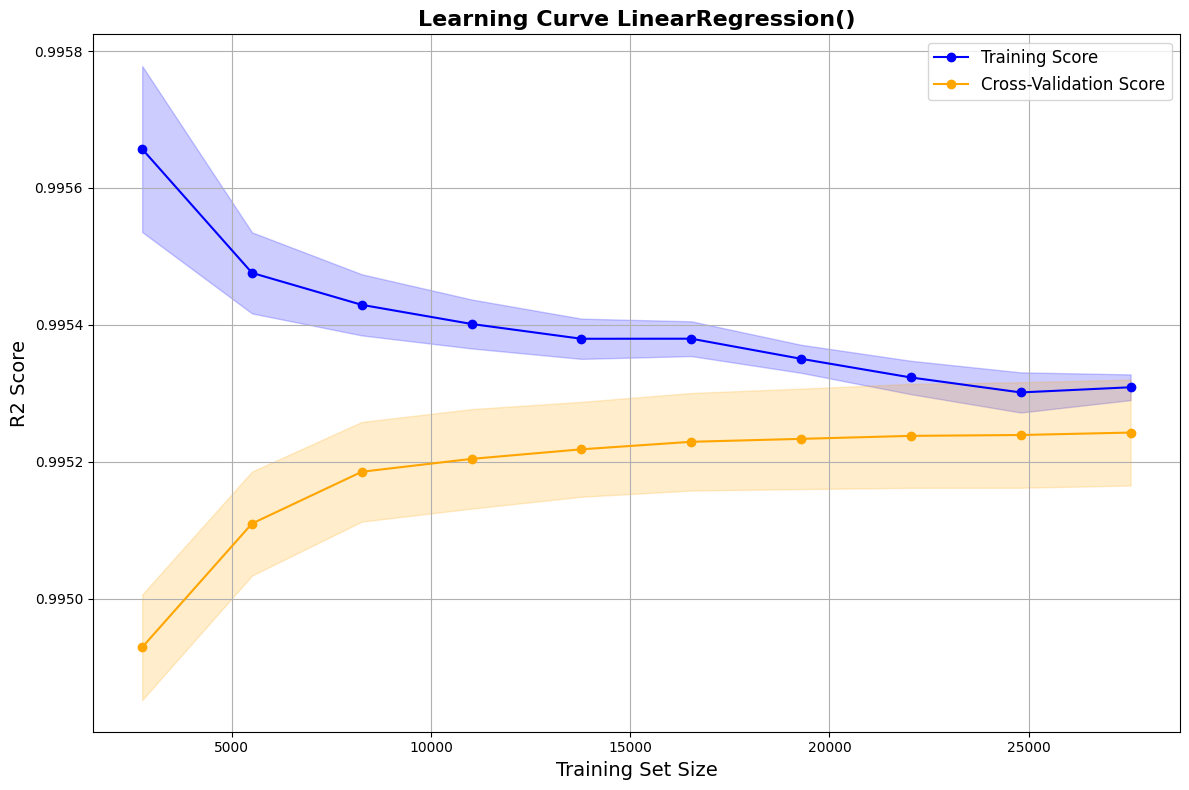

             Y_test  Linear Regression  Polynomial Regression
count  14763.000000       14763.000000           14763.000000
mean   18016.646516       18019.376287           18019.389490
std     4240.014243        4231.041668            4231.348853
min     7038.173266        7284.927132            7253.090996
25%    14953.909115       14953.173918           14954.152372
50%    17970.157550       17950.511516           17952.484659
75%    20972.887205       21011.522457           21008.187369
max    29917.339140       29962.256025           29947.575124


In [22]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # Degree of the polynomial
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Create and fit the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)

# Predict using the polynomial model
y_pred_poly = evaluate_model(poly_model, X_poly_train, Y_train, X_poly_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_poly_values = y_pred_poly["Predicted Values"]

# Flatten y_pred_poly_values to 1D
y_pred_poly_values = y_pred_poly_values.flatten()  # or use y_pred_poly_values.ravel()

# # Calculate descriptive statistics for both Y_test and Y_pred_poly
# y_test_stats = Y_test.describe().to_frame(name="Y_test")
y_pred_stats = (
    pd.Series(y_pred_poly_values, name="Polynomial Regression")
    .describe()
    .to_frame(name="Polynomial Regression")
)

# Combine both statistics into one table
stats_table = pd.concat([stats_table, y_pred_stats], axis=1)

# Display the result
print(stats_table)

# Removing predicted values from y_pred_poly
del y_pred_poly["Predicted Values"]

# Add final result for Polynomial Regression
final_result["Polynomial Regression"] = y_pred_poly

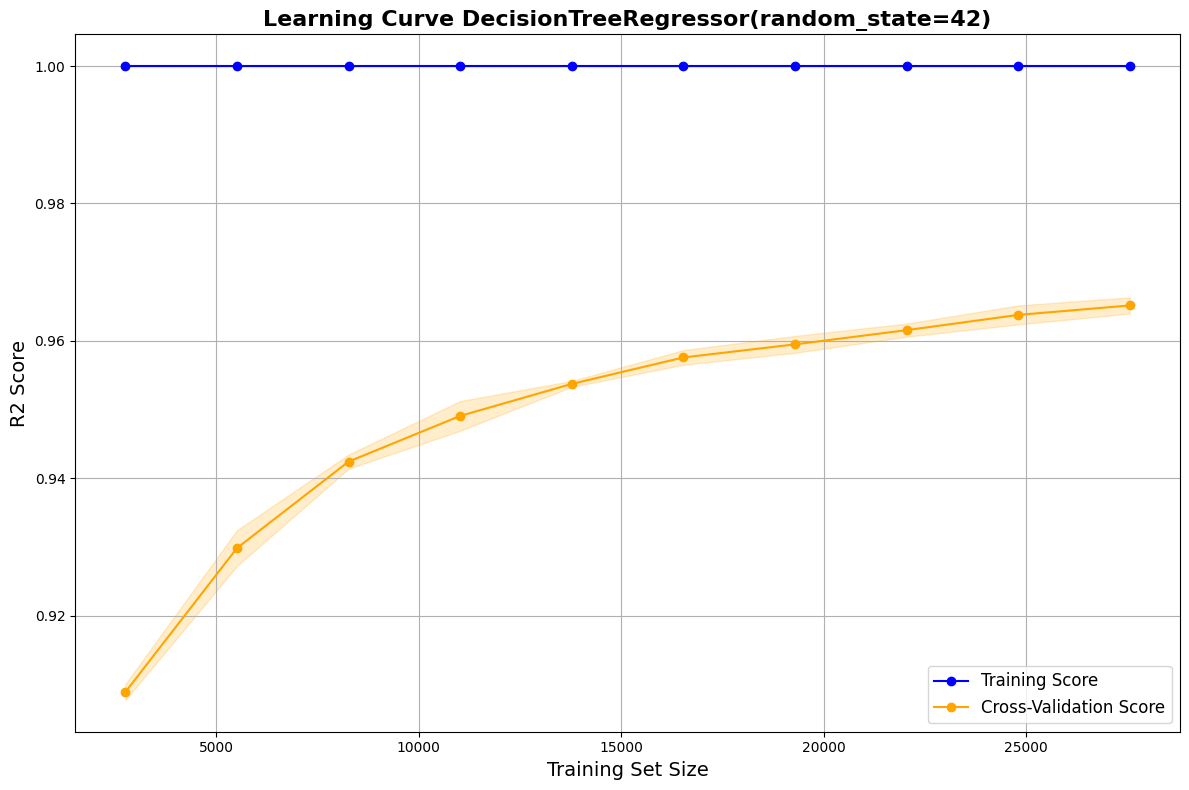

             Y_test  Linear Regression  Polynomial Regression  \
count  14763.000000       14763.000000           14763.000000   
mean   18016.646516       18019.376287           18019.389490   
std     4240.014243        4231.041668            4231.348853   
min     7038.173266        7284.927132            7253.090996   
25%    14953.909115       14953.173918           14954.152372   
50%    17970.157550       17950.511516           17952.484659   
75%    20972.887205       21011.522457           21008.187369   
max    29917.339140       29962.256025           29947.575124   

       Decision Tree Regression  
count              14763.000000  
mean               18024.887136  
std                 4245.711108  
min                 7146.806611  
25%                14973.766590  
50%                17947.111440  
75%                21007.155300  
max                29753.402200  


In [23]:
# Decision Tree Regression

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)

# Predict using the Decision Tree model
y_pred_tree = evaluate_model(tree_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_tree_values = y_pred_tree["Predicted Values"]

# Flatten y_pred_tree_values to 1D
y_pred_tree_values = y_pred_tree_values.flatten()  # or use y_pred_tree_values.ravel()

# Calculate descriptive statistics for both Y_test and Y_pred_tree
# y_test_stats = Y_test.describe().to_frame(name="Y_test")
y_pred_stats = (
    pd.Series(y_pred_tree_values, name="Decision Tree Regression")
    .describe()
    .to_frame(name="Decision Tree Regression")
)

# Combine both statistics into one table
stats_table = pd.concat([stats_table, y_pred_stats], axis=1)

# Display the result
print(stats_table)

# Removing predicted values from y_pred_tree
del y_pred_tree["Predicted Values"]

# Add final result for Decision Tree Regression
final_result["Decision Tree Regression"] = y_pred_tree

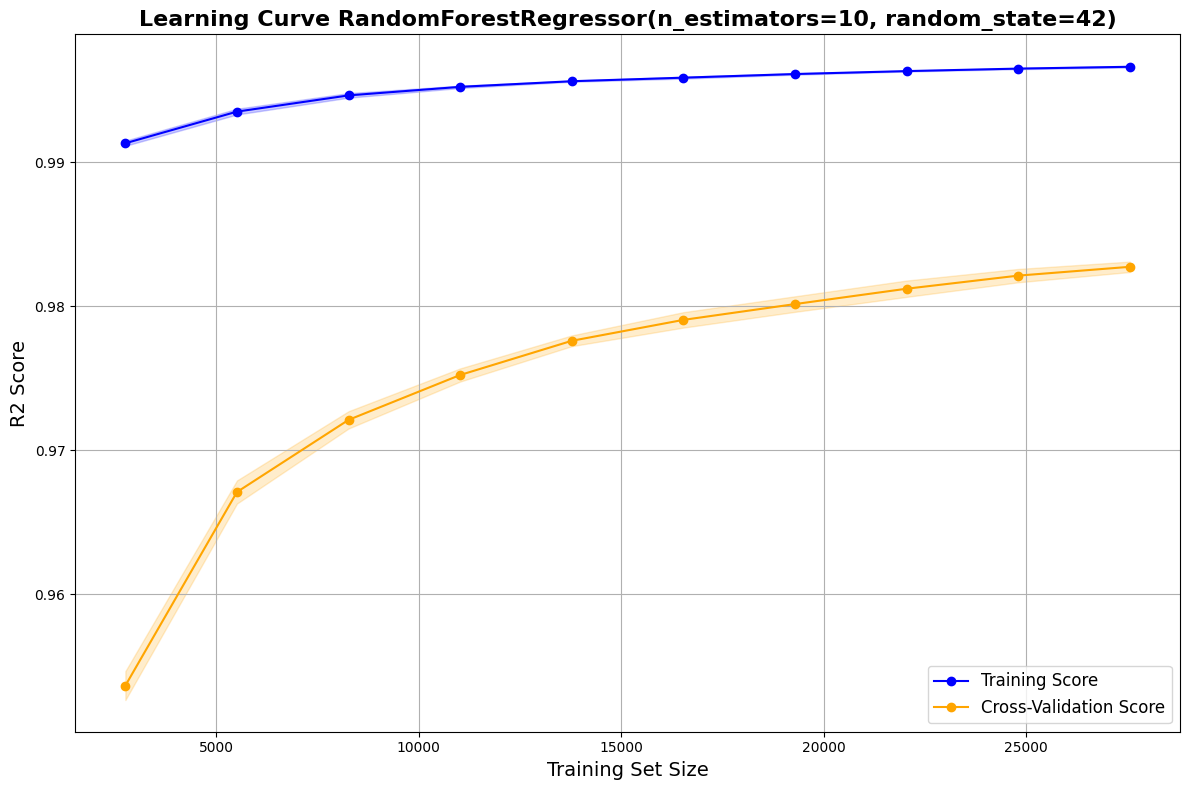

In [24]:
# Random Forest Regression

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = evaluate_model(rf_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_rf_values = y_pred_rf["Predicted Values"]

# Flatten y_pred_rf_values to 1D
y_pred_rf_values = y_pred_rf_values.flatten()

# Calculate descriptive statistics for Random Forest Regression
y_pred_rf_stats = (
    pd.Series(y_pred_rf_values, name="Random Forest Regression")
    .describe()
    .to_frame(name="Random Forest Regression")
)

# Append to the stats_table
stats_table = pd.concat([stats_table, y_pred_rf_stats], axis=1)

# Add final result for Random Forest Regression
final_result["Random Forest Regression"] = y_pred_rf

# Removing predicted values from y_pred_tree
del y_pred_rf["Predicted Values"]

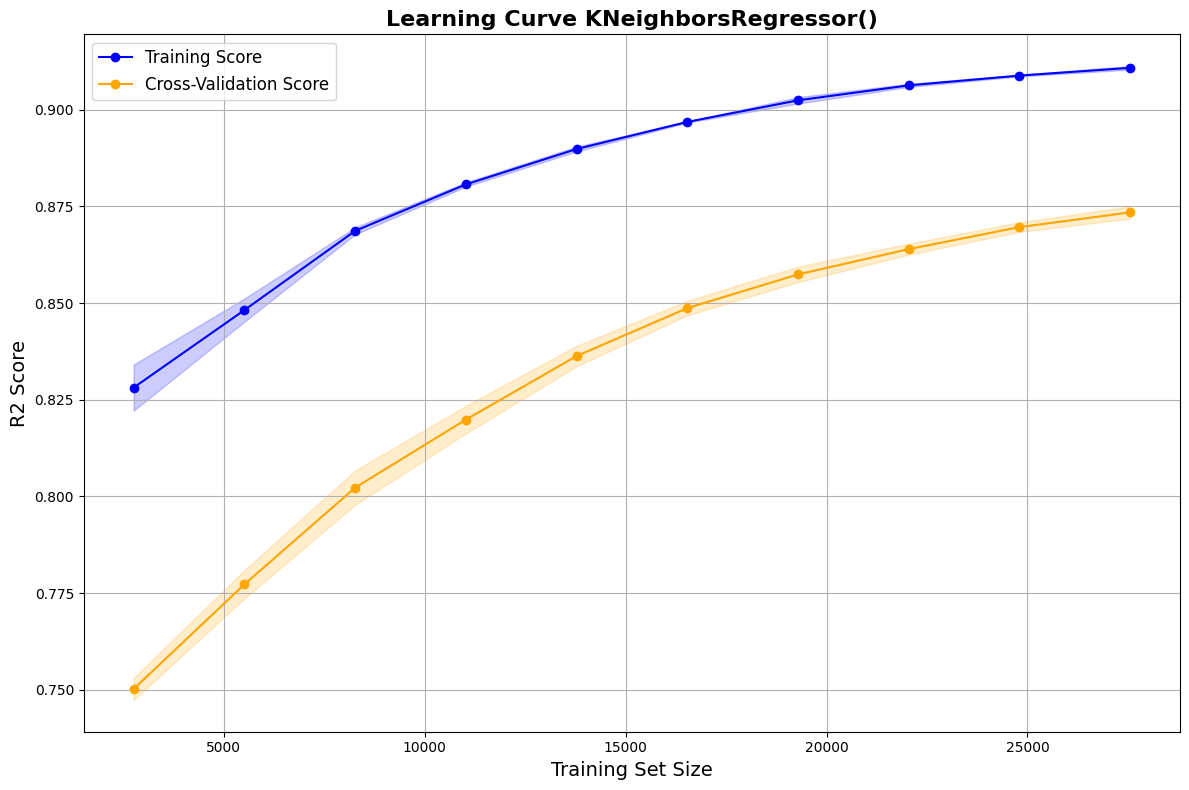

In [25]:
# K-Nearest Neighbors (KNN) Regression

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)
y_pred_knn = evaluate_model(knn_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_knn_values = y_pred_knn["Predicted Values"]

# Flatten y_pred_knn_values to 1D
y_pred_knn_values = y_pred_knn_values.flatten()

# Calculate descriptive statistics for KNN Regression
y_pred_knn_stats = (
    pd.Series(y_pred_knn_values, name="K-Nearest Neighbors (KNN) Regression")
    .describe()
    .to_frame(name="K-Nearest Neighbors (KNN) Regression")
)

# Append to the stats_table
stats_table = pd.concat([stats_table, y_pred_knn_stats], axis=1)

# Add final result for KNN Regression
final_result["K-Nearest Neighbors (KNN) Regression"] = y_pred_knn

# Removing predicted values from y_pred_tree
del y_pred_knn["Predicted Values"]

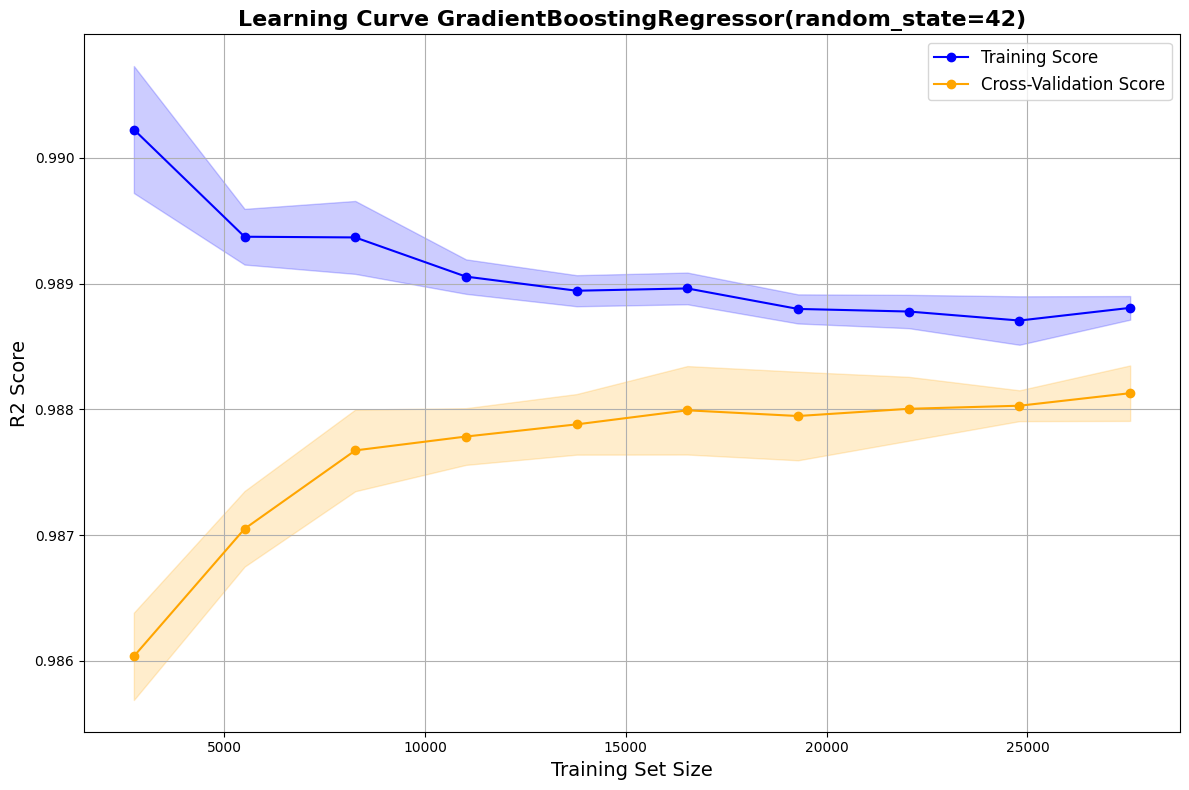

In [26]:
# Gradient Boosting Regression

gb_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, random_state=42
)
gb_model.fit(X_train, Y_train)
y_pred_gb = evaluate_model(gb_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_gb_values = y_pred_gb["Predicted Values"]

# Flatten y_pred_gb_values to 1D
y_pred_gb_values = y_pred_gb_values.flatten()

# Calculate descriptive statistics for Gradient Boosting Regression
y_pred_gb_stats = (
    pd.Series(y_pred_gb_values, name="Gradient Boosting Regression")
    .describe()
    .to_frame(name="Gradient Boosting Regression")
)

# Append to the stats_table
stats_table = pd.concat([stats_table, y_pred_gb_stats], axis=1)

# Add final result for Gradient Boosting Regression
final_result["Gradient Boosting Regression"] = y_pred_gb

# Removing predicted values from y_pred_tree
del y_pred_gb["Predicted Values"]

In [27]:
# XGBoost Regression

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, Y_train)
y_pred_xgb = evaluate_model(xgb_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_xgb_values = y_pred_xgb["Predicted Values"]

# Flatten y_pred_xgb_values to 1D
y_pred_xgb_values = y_pred_xgb_values.flatten()

# Calculate descriptive statistics for XGBoost Regression
y_pred_xgb_stats = (
    pd.Series(y_pred_xgb_values, name="XGBoost Regression")
    .describe()
    .to_frame(name="XGBoost Regression")
)

# Append to the stats_table
stats_table = pd.concat([stats_table, y_pred_xgb_stats], axis=1)

# Add final result for XGBoost Regression
final_result["XGBoost Regression"] = y_pred_xgb


# Add final result for XGBoost Regression
final_result["XGBoost Regression"] = y_pred_xgb

AttributeError: 'super' object has no attribute '__sklearn_tags__'

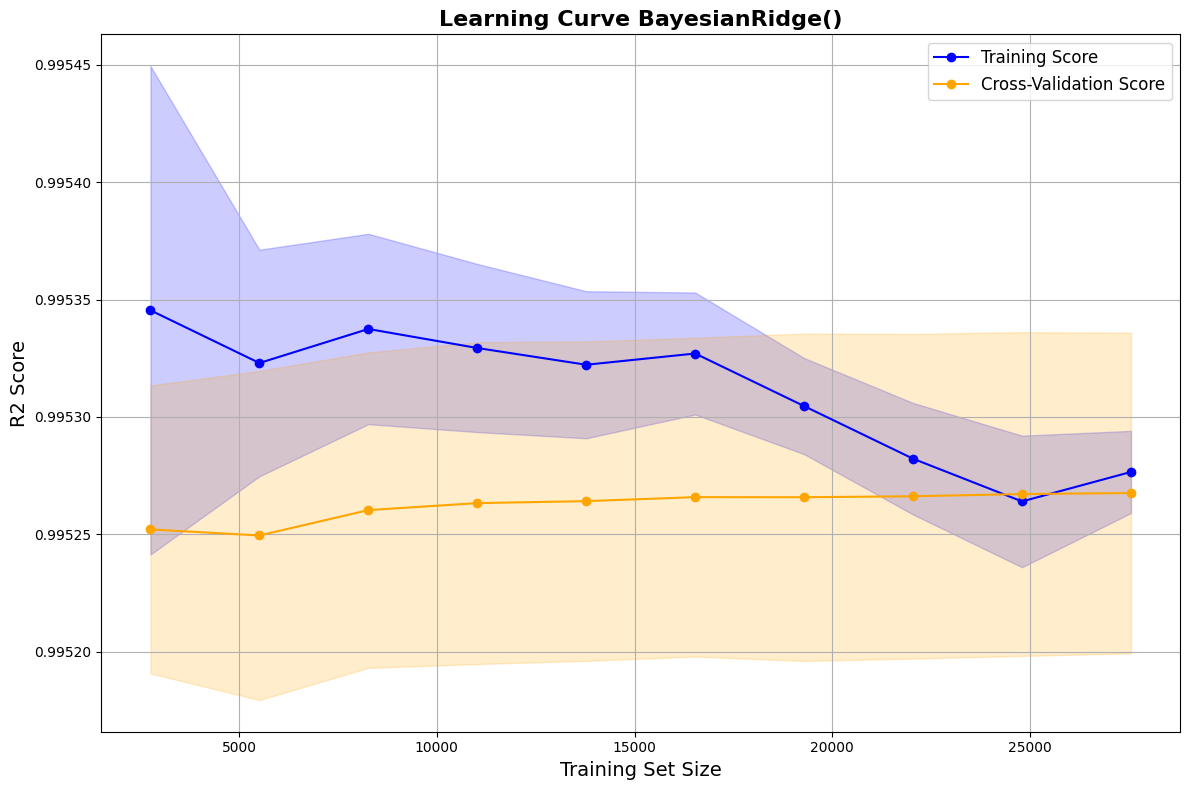

In [29]:
# Bayesian Regression

bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, Y_train)
y_pred_bayesian = evaluate_model(bayesian_model, X_train, Y_train, X_test, Y_test)

# Extract the predicted values from the evaluation result
y_pred_bayesian_values = y_pred_bayesian["Predicted Values"]

# Flatten y_pred_bayesian_values to 1D
y_pred_bayesian_values = y_pred_bayesian_values.flatten()

# Calculate descriptive statistics for Bayesian Regression
y_pred_bayesian_stats = (
    pd.Series(y_pred_bayesian_values, name="Bayesian Regression")
    .describe()
    .to_frame(name="Bayesian Regression")
)

# Append to the stats_table
stats_table = pd.concat([stats_table, y_pred_bayesian_stats], axis=1)

# Add final result for Bayesian Regression
final_result["Bayesian Regression"] = y_pred_bayesian

# Add final result for XGBoost Regression
final_result["XGBoost Regression"] = y_pred_bayesian

Preparing the FInal Result

In [30]:
final_result

{'Linear Regression': {'MSE': 84195.53263710404,
  'R2 Score': 0.9953163564390061},
 'Polynomial Regression': {'MSE': 84700.42698776376,
  'R2 Score': 0.9952882700892867},
 'Decision Tree Regression': {'MSE': 563438.643706915,
  'R2 Score': 0.9686569382845127},
 'Random Forest Regression': {'MSE': 281735.74088381056,
  'R2 Score': 0.9843275557816138},
 'K-Nearest Neighbors (KNN) Regression': {'MSE': 2165965.335814604,
  'R2 Score': 0.8795113080150097},
 'Gradient Boosting Regression': {'MSE': 207233.10747143396,
  'R2 Score': 0.9884720010785273},
 'Bayesian Regression': {'MSE': 84195.51333110151,
  'R2 Score': 0.9953163575129637,
  'Predicted Values': array([13816.36375505, 27306.75765011, 14636.04985679, ...,
         12483.93964651, 18356.95090851, 15751.07285176])},
 'XGBoost Regression': {'MSE': 84195.51333110151,
  'R2 Score': 0.9953163575129637,
  'Predicted Values': array([13816.36375505, 27306.75765011, 14636.04985679, ...,
         12483.93964651, 18356.95090851, 15751.0728517

In [ ]:
# Removing predicted values from y_pred_tree
# del y_pred_rf["Predicted Values"]
# del y_pred_knn["Predicted Values"]
# del y_pred_gb["Predicted Values"]
# del y_pred_xgb["Predicted Values"]
# del y_pred_bayesian["Predicted Values"]



In [ ]:
# Add final result for Random Forest Regression
# final_result["Random Forest Regression"] = y_pred_rf

# # Add final result for KNN Regression
# final_result["K-Nearest Neighbors (KNN) Regression"] = y_pred_knn

# # Add final result for Gradient Boosting Regression
# final_result["Gradient Boosting Regression"] = y_pred_gb

# # Add final result for XGBoost Regression
# final_result["XGBoost Regression"] = y_pred_xgb

# # Add final result for Bayesian Regression
# final_result["Bayesian Regression"] = y_pred_bayesian

In [ ]:
# # Stepwise Regression

# X_train_with_const = add_constant(X_train)
# X_test_with_const = add_constant(X_test)

# stepwise_model = OLS(Y_train, X_train_with_const)
# stepwise_model.fit(X_train_with_const, Y_train)
# y_pred_stepwise = evaluate_model(stepwise_model, X_test_with_const, Y_test)
# final_result["Stepwise Regression"] = y_pred_stepwise


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
# Display the final stats table
stats_table

,Y_test,Linear Regression,Polynomial Regression,Decision Tree Regression,Random Forest Regression,K-Nearest Neighbors (KNN) Regression,Gradient Boosting Regression,Bayesian Regression
count,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000
mean,18016.646516,18019.376287,18019.389490,18024.887136,18015.481736,18033.574816,18018.557888,18019.376345
std,4240.014243,4231.041668,4231.348853,4245.711108,4186.531932,3609.880808,3993.742377,4231.029979
min,7038.173266,7284.927132,7253.090996,7146.806611,7602.091284,7450.742101,8326.656795,7284.954995
25%,14953.909115,14953.173918,14954.152372,14973.766590,14983.677017,15438.854884,15124.586130,14953.183333
50%,17970.157550,17950.511516,17952.484659,17947.111440,17953.883649,17943.102238,17967.046681,17950.512945
75%,20972.887205,21011.522457,21008.187369,21007.155300,20975.984981,20536.549720,20841.455748,21011.514459
max,29917.339140,29962.256025,29947.575124,29753.402200,29514.252567,29118.434428,28924.879620,29962.222702


In [32]:
final_result_report = pd.DataFrame(final_result , columns=['Model' , 'MSE' , 'R2 Score'])
final_result_report

,Model,MSE,R2 Score


In [33]:
# Applying np.floor to each MSE value
for model, metrics in final_result.items():
    metrics["MSE"] = int(np.floor(metrics["MSE"]))

# Display the modified dictionary
final_result

{'Linear Regression': {'MSE': 84195, 'R2 Score': 0.9953163564390061},
 'Polynomial Regression': {'MSE': 84700, 'R2 Score': 0.9952882700892867},
 'Decision Tree Regression': {'MSE': 563438, 'R2 Score': 0.9686569382845127},
 'Random Forest Regression': {'MSE': 281735, 'R2 Score': 0.9843275557816138},
 'K-Nearest Neighbors (KNN) Regression': {'MSE': 2165965,
  'R2 Score': 0.8795113080150097},
 'Gradient Boosting Regression': {'MSE': 207233,
  'R2 Score': 0.9884720010785273},
 'Bayesian Regression': {'MSE': 84195,
  'R2 Score': 0.9953163575129637,
  'Predicted Values': array([13816.36375505, 27306.75765011, 14636.04985679, ...,
         12483.93964651, 18356.95090851, 15751.07285176])},
 'XGBoost Regression': {'MSE': 84195,
  'R2 Score': 0.9953163575129637,
  'Predicted Values': array([13816.36375505, 27306.75765011, 14636.04985679, ...,
         12483.93964651, 18356.95090851, 15751.07285176])}}

In [34]:
# Convert dictionary to DataFrame
final_result_report = (
    pd.DataFrame(final_result)
    .T
    .drop(columns=['Predicted Values'], errors='ignore')
    .reset_index()
)
final_result_report.columns = ["Model", "MSE", "R2 Score"]

# Sort the DataFrame by 'R2 Score' in descending order
final_result_report = final_result_report.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
final_result_report

,Model,MSE,R2 Score
0,Bayesian Regression,84195,0.995316
1,XGBoost Regression,84195,0.995316
2,Linear Regression,84195.0,0.995316
3,Polynomial Regression,84700.0,0.995288
4,Gradient Boosting Regression,207233.0,0.988472
5,Random Forest Regression,281735.0,0.984328
6,Decision Tree Regression,563438.0,0.968657
7,K-Nearest Neighbors (KNN) Regression,2165965.0,0.879511


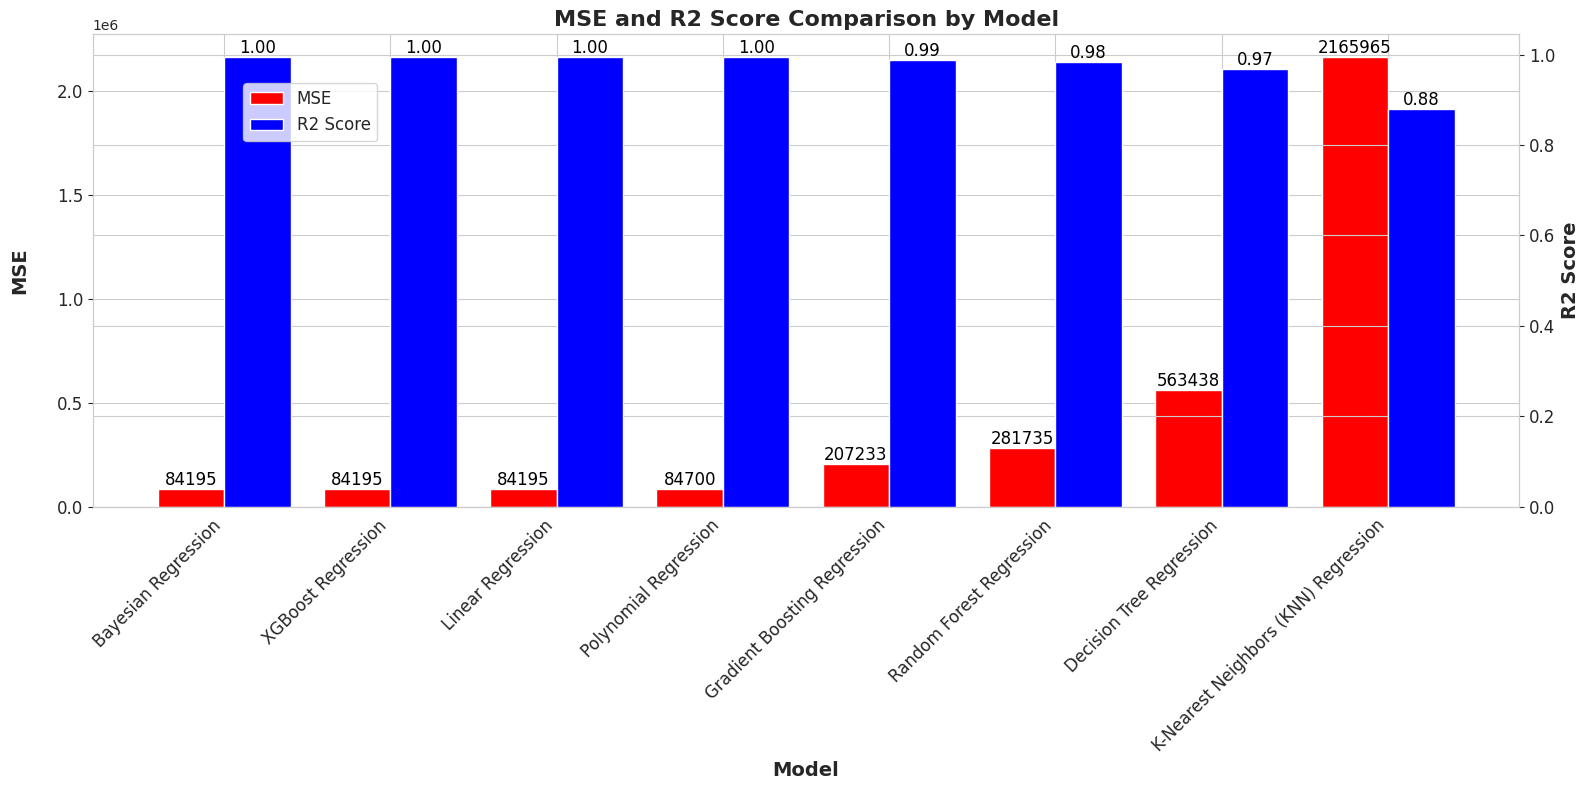

In [37]:
# Data
models = final_result_report["Model"]
mse = final_result_report["MSE"]
r2_score = final_result_report["R2 Score"]

# Set width of bars
bar_width = 0.4
index = np.arange(len(models))

# Setting up the plot aesthetics
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(16, 8))

# First y-axis for MSE
bars1 = ax1.bar(index - bar_width / 2, mse, bar_width, color="red", label="MSE")
ax1.set_xlabel("Model", fontweight="bold", fontsize=14)
ax1.set_ylabel("MSE", fontweight="bold", fontsize=14, rotation=90, labelpad=20)
ax1.tick_params(axis="y", labelsize=12)

# Adding data labels for MSE
for bar in bars1:
    yval = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.0f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,
    )

# Second y-axis for R2 Score
ax2 = ax1.twinx()
bars2 = ax2.bar(
    index + bar_width / 2, r2_score, bar_width, color="blue", label="R2 Score"
)
ax2.set_ylabel("R2 Score", fontweight="bold", fontsize=14)
ax2.tick_params(axis="y", labelsize=12)

# Adding data labels for R2 Score
for bar in bars2:
    yval = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.2f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,
    )

# Title and x-axis labels
plt.title("MSE and R2 Score Comparison by Model", fontsize=16, fontweight="bold")
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45, ha="right", fontsize=12)

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9), fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# import pandas as pd


# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         "linear_regression": {
#             "model": LinearRegression(),
#             "params": {"fit_intercept": [True, False]},
#         },
#         "ridge_regression": {
#             "model": Ridge(),
#             "params": {
#                 "alpha": [0.1, 1.0, 10.0],
#                 "fit_intercept": [True, False],
#                 "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg"],
#             },
#         },
#         "lasso_regression": {
#             "model": Lasso(alpha=0.5, max_iter=5000),
#             "params": {"alpha": [0.1, 1, 10], "selection": ["random", "cyclic"]},
#         },
#         "polynomial_regression": {
#             "model": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#             "params": {
#                 "polynomialfeatures__degree": [2, 3, 4],
#                 "polynomialfeatures__include_bias": [True, False],
#                 "linearregression__fit_intercept": [True, False],
#             },
#         },
#         "decision_tree_regression": {
#             "model": DecisionTreeRegressor(),
#             "params": {
#                 "criterion": ["squared_error", "friedman_mse"],
#                 "splitter": ["best", "random"],
#                 "max_depth": [None, 10, 20, 30],
#                 "min_samples_split": [2, 5, 10],
#             },
#         },
#         "random_forest_regression": {
#             "model": RandomForestRegressor(),
#             "params": {
#                 "n_estimators": [50, 100, 200],
#                 "criterion": ["squared_error", "friedman_mse"],
#                 "max_depth": [None, 10, 20, 30],
#                 "min_samples_split": [2, 5, 10],
#             },
#         },
#         "k_nearest_neighbors_regression": {
#             "model": KNeighborsRegressor(),
#             "params": {
#                 "n_neighbors": [3, 5, 7, 9],
#                 "weights": ["uniform", "distance"],
#                 "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#             },
#         },
#         "gradient_boosting_regression": {
#             "model": GradientBoostingRegressor(),
#             "params": {
#                 "n_estimators": [50, 100, 200],
#                 "learning_rate": [0.01, 0.1, 0.5],
#                 "max_depth": [3, 5, 7],
#                 "loss": ["squared_error", "huber", "quantile"],
#             },
#         },
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         try:
#             gs = GridSearchCV(
#                 config["model"], config["params"], cv=cv, return_train_score=False
#             )
#             gs.fit(X, Y.ravel())
#             scores.append(
#                 {
#                     "model": algo_name,
#                     "best_score": gs.best_score_,
#                     "best_params": gs.best_params_,
#                 }
#             )
#         except ValueError as e:
#             print(f"Error with {algo_name}: {e}")

#     return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


# # Example call
# find_best_model_using_gridsearchcv(X, Y)

In [ ]:
final_result_report.to_excel("Regression Report.xlsx" , index = False)

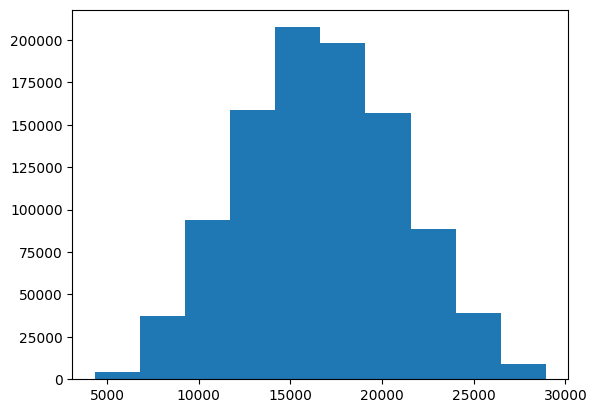

In [ ]:
plt.hist(dataset['charges'])
plt.show()